# 5. Evaluation Project  - (Global Power Plant Database)

# <span style="color:red">By :- Punit Vishal Singh</span>

# <span style="color:blue">-----------------------------------------------------------------------------------------------------------------</span>

__--> Description:__


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available. 



# <span style="color:blue">---------------------------------------------> Description  <---------------------------------------------</span>

__Key attributes of the database
The database includes the following indicators:__

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

# <span style="color:red">----------------------------------------------> Objective <---------------------------------------------</span>

* __Make two prediction  1) Primary Fuel    2) capacity_mw__

# <span style="color:red">-----------------------------------------------> Steps <--------------------------------------------------</span>

1. Exploratory data analysis

2. Data modeling

3. Outlier detection and skewness treatment

4. Encoding the data — Label Encoder

5. Scaling the data — Standard scaler

6. Fitting the machine learning models

7. Cross-validation of the selected model

8. Model hypertuning

9. AUC-ROC curve

10. Saving the final model and prediction using saved model

### <span style="color:green">Import Packages</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline


### <span style="color:green">Loading The Dataset...............</span>

In [2]:
df=pd.read_csv("database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style="color:red">Data Preparation & Cleaning</span>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### <span style="color:blue">Observation:-</span>

- Here, we can see that, few columns are there which contains NaN values in the given dataset.

In [5]:
type(df)

pandas.core.frame.DataFrame

### <span style="color:green">Checking Column Names</span>

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 907 rows and 27 columns


### <span style="color:green">To check the number of columns of object datatype</span>

In [8]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 12


# <span style="color:red">Exploratory Data Analysis (EDA)</span>

### <span style="color:green">Checking Null/Missing Values</span>

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

### <span style="color:blue">How To Treat The Null Values?</span>

- We will fill all the NaN Values with the Median of each column. 
- We can drop all the Nan values from the dataset by using #df=df.dropna() or we can replace it with mean or median 
- We are not replacing NaN with Mean because most of the columns are categorical in nature in the range of (0,1) which will not work.
- We are going to replace the Nan values with Median.

In [10]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


### <span style="color:green">** To Print All Of The Object Data Type & Their Unique Values All Together</span>

In [11]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("-----------------------------------------------------------------------------------------------------------")

country : ['IND']
IND    907
Name: country, dtype: int64
-----------------------------------------------------------------------------------------------------------
country_long : ['India']
India    907
Name: country_long, dtype: int64
-----------------------------------------------------------------------------------------------------------
name : ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Mari

### <span style="color:green">To Drop The Unnecessary Columns </span>

In [12]:
df = df.drop(['country', 
              'country_long', 
              'name', 
              'gppd_idnr',
              'latitude', 
              'longitude',
              'other_fuel1',
              'other_fuel2',
              'other_fuel3',
              'owner',
              'url', 
              'wepp_id',
              'year_of_capacity_data',
              'generation_gwh_2013',
              'generation_gwh_2019',
              'generation_data_source',
              'estimated_generation_gwh'],axis = 1)

In [13]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 907 rows and 10 columns


#### <span style="color:black">Lets replace null values with 0</span>

In [14]:

df.fillna(value = 0 ,inplace = True)
df['commissioning_year'].replace(0, df['commissioning_year'].median(),inplace = True)

#### <span style="color:black">Lets use commissioning_year to know how old the power plant is and create a column Power_plant_Years</span>

In [15]:
df['Power_plant_Years'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

### <span style="color:blue">We are Replacing NaN Values of 'generation_gwh' column with their respective median</span>

In [16]:
df['generation_gwh_2014'].replace(0, df['generation_gwh_2014'].median(),inplace = True)

df['generation_gwh_2015'].replace(0, df['generation_gwh_2015'].median(),inplace = True)

df['generation_gwh_2016'].replace(0, df['generation_gwh_2016'].median(),inplace = True)

df['generation_gwh_2017'].replace(0, df['generation_gwh_2017'].median(),inplace = True)

df['generation_gwh_2018'].replace(0, df['generation_gwh_2018'].median(),inplace = True)


In [17]:
df.sum().isnull()

capacity_mw            False
primary_fuel           False
source                 False
generation_gwh_2014    False
generation_gwh_2015    False
generation_gwh_2016    False
generation_gwh_2017    False
generation_gwh_2018    False
Power_plant_Years      False
dtype: bool

#### <span style="color:black">Lets have a look on entries from geolocation_source column</span>

In [18]:
df["geolocation_source"].value_counts()

WRI                                     765
Industry About                          119
0                                        19
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

#### <span style="color:black">Lets replace 0 with most frequent element in geolocation_source column(WRI)</span>

In [19]:
df['geolocation_source'].replace(0, 'WRI',inplace = True)

### <span style="color:blue">Again Checking Null/Missing Values</span>

In [20]:
df.isnull().sum()

capacity_mw            0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_Years      0
dtype: int64

#### <span style="color:black">Let's understand - How plant age affects our model(capacity_mw)</span>

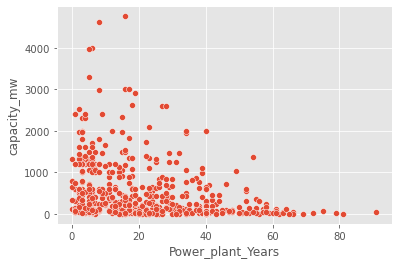

In [21]:

plt.style.use('ggplot')
sns.scatterplot(x = "Power_plant_Years", y = "capacity_mw", data = df)
plt.show()

#### <span style="color:blue">Observation:-</span>

- As we can see that older powerplants has lower capacity_mw compared to plants which have started recently.

#### <span style="color:black">Let's understand - Relation between fuel used and powerplant age</span>

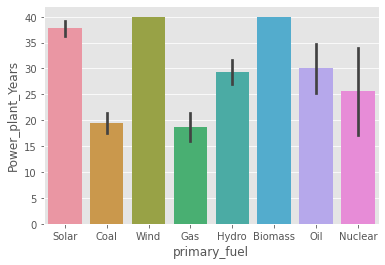

In [22]:
sns.barplot(x = "primary_fuel", y = "Power_plant_Years", data = df)
plt.show()

#### <span style="color:blue">Observation:-</span>

- As we can see that that older plants use solar, wind and biomass.

#### <span style="color:black">Let's understand - primary_fuel based on capaciy_mw</span>

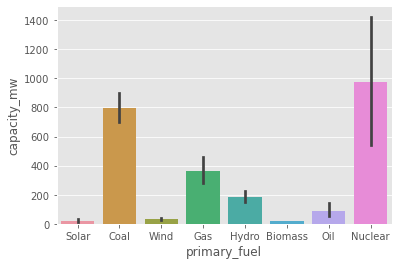

In [23]:
sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.show()

#### <span style="color:blue">Observation:-</span>

- As we can see that capacity_mw is high in case of Nuclear power plants, and coal power plants has capacity_mw next to it.

### <span style="color:blue">Correlation with Heatmap</span>

<AxesSubplot:>

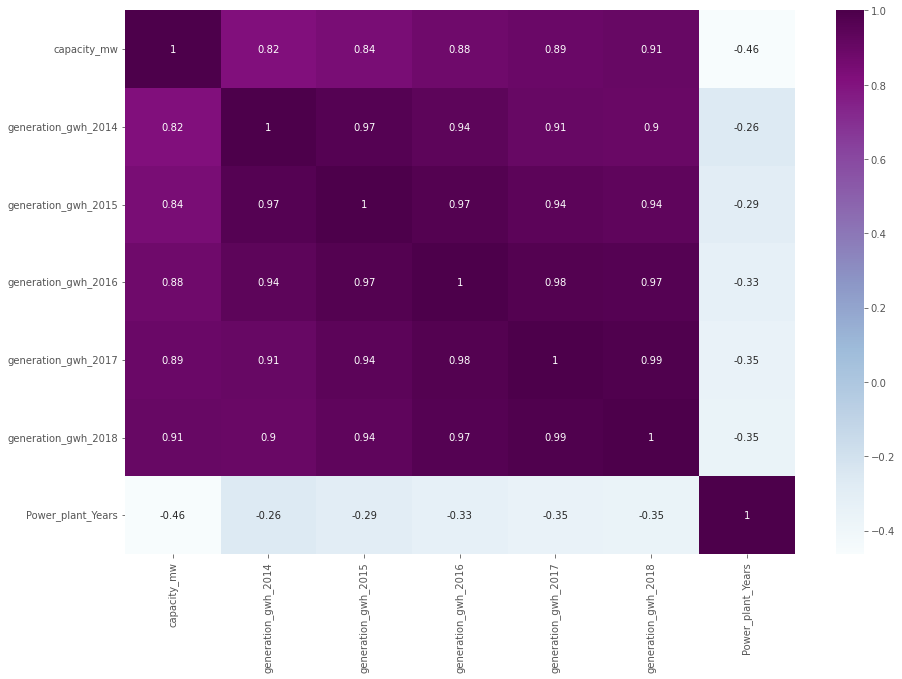

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

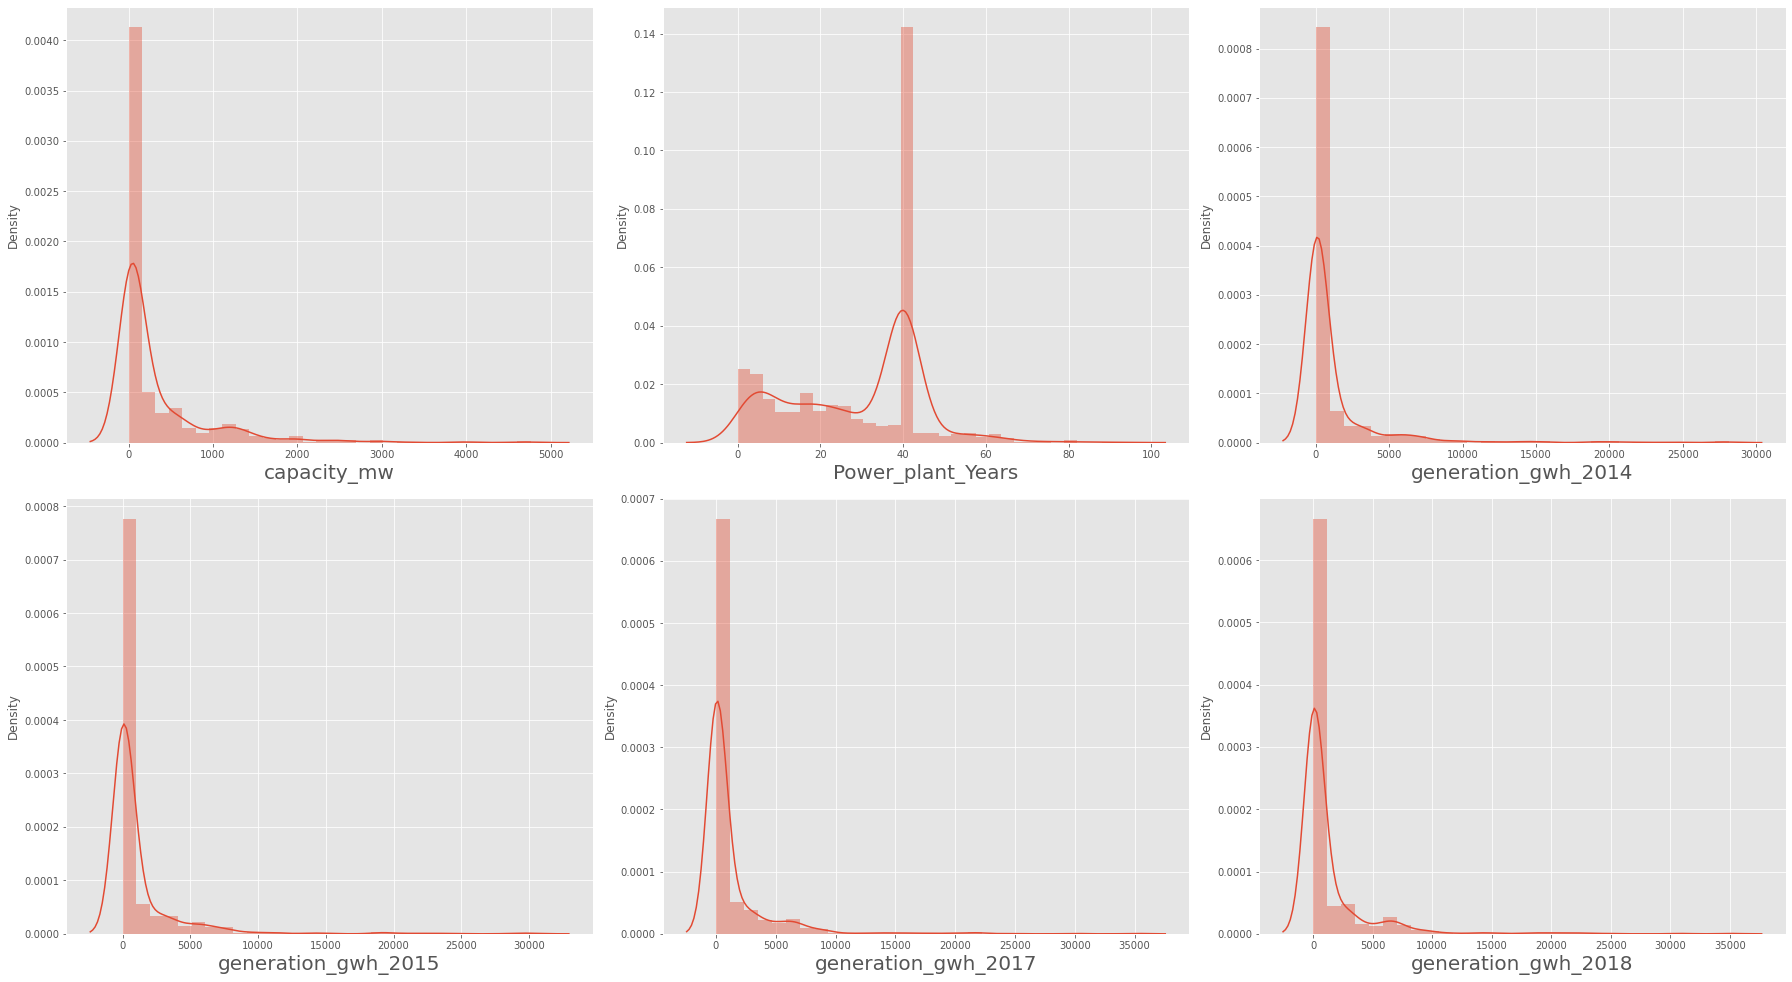

In [25]:
plt.figure(figsize = (25,20))
plotnumber = 1
col = ["capacity_mw","Power_plant_Years","generation_gwh_2014","generation_gwh_2015","generation_gwh_2017","generation_gwh_2018"]
for column in col:
    if plotnumber <=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

### <span style="color:blue">Removing Outliers With The Help Of ZScore Method From Skewed Features</span>

In [27]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["Power_plant_Years","generation_gwh_2014","generation_gwh_2015","generation_gwh_2017","generation_gwh_2018"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

#### <span style="color:black"> Note - We are deleting index column because we don't required </span>

In [28]:
df.drop(columns = "index", inplace = True)

## <span style="color:red">Model Building</span>

### <span style="color:green">Level Encoder</span>

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
leb_enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = leb_enc.fit_transform(df[i])

In [31]:
x = df.drop(columns = ["capacity_mw"])
y = df["capacity_mw"]

### <span style="color:green">Using Log Transformation - To Fix Skewness Present In The Data</span>

In [32]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

### <span style="color:green">Applying Standard Scalar - To Seperating Numerical Data</span>

#### <span style="color:blue"> Deleting "primary_fuel","source","geolocation_source"</span>

In [33]:
num_data = x.drop(columns = ["primary_fuel","source","geolocation_source"])

In [34]:
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns = num_data.columns)

## <span style="color:green">Spliting the data for training & testing </span>

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = 1)

In [36]:
print("X Train Shape ",x_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",x_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (663, 9)
Y Train Shape  (663,)
X Test Shape  (221, 9)
Y Test Shape  (221,)


## <span style="color:green">Applying Linear Regression Model </span>

In [37]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

#### <span style="color:blue"> Model Evaluation</span>

In [38]:
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 202.17795585052247
RMSE : 284.36465919351974


#### <span style="color:blue"> Model r2 Score</span>

In [ ]:
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_lr)*100}%")

## <span style="color:green">Applying DecesionTreeRegressor Model </span>

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dt = DecisionTreeRegressor()

In [45]:
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

#### <span style="color:blue"> Model Evaluation</span>

In [46]:
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 96.96189310814343
RMSE : 194.39848260863445


#### <span style="color:blue"> Model r2 Score</span>

In [47]:
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_dt)*100}%")

Training r2 Score : 99.74309459775714 %
Testing r2 Score: 72.59516733198579%


## <span style="color:green">Applying RandomForestRegressor Model </span>

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor()

In [50]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

#### <span style="color:blue"> Model Evaluation</span>

In [51]:
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 86.31156949628401
RMSE : 162.21452974690308


#### <span style="color:blue"> Model r2 Score</span>

In [52]:
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_rf)*100}%")

Training r2 Score : 96.48305256643259 %
Testing r2 Score: 80.91813069151034%


## <span style="color:green">Applying KNeighborsRegressor Model </span>

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
knn =  KNeighborsRegressor()

In [57]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)
pred_knn = knn.predict(x_test)

#### <span style="color:blue"> Model Evaluation</span>

In [58]:
mse = mean_squared_error(y_test,pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knn)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 104.33300633484164
RMSE : 192.87443776266625


#### <span style="color:blue"> Model r2 Score</span>

In [60]:
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_knn)*100}%")

Training r2 Score : 78.34405357490257 %
Testing r2 Score: 73.0231796720088%


## <span style="color:green">Applying Support Vactor (SVM) Regressor Model </span>

In [61]:
from sklearn.svm import SVR

In [62]:
svm =  KNeighborsRegressor()

In [63]:
svm.fit(x_train, y_train)
y_pred = svm.predict(x_train)
pred_svm = svm.predict(x_test)

#### <span style="color:blue"> Model Evaluation</span>

In [65]:
mse = mean_squared_error(y_test,pred_svm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_svm)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 104.33300633484164
RMSE : 192.87443776266625


#### <span style="color:blue"> Model r2 Score</span>

In [67]:
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_svm)*100}%")

Training r2 Score : 78.34405357490257 %
Testing r2 Score: 73.0231796720088%


## <span style="color:green">Applying XGBRegressor Regressor Model </span>

In [68]:
from xgboost import XGBRegressor

In [69]:
xgb = XGBRegressor()

In [70]:
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_train)
pred_xgb = xgb.predict(x_test)

#### <span style="color:blue"> Model Evaluation</span>

In [71]:
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgb)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 84.87733886998811
RMSE : 161.7539568439394


#### <span style="color:blue"> Model Evaluation</span>

In [72]:
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_xgb)*100}%")

Training r2 Score : 99.72525845236162 %
Testing r2 Score: 81.02633450416124%


## <span style="color:green">Checking the accuracy of all 8 models</span>

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [84]:


# For KNearest Neibour
print("knn classification score",knn.score(x_train,y_train))

# For Deciesion Tree
print("dt classification score",dt.score(x_train,y_train))

# For Random Forest
print("rf classification score",rf.score(x_train,y_train))


# For support vactor classifier
print("svm classification score",svm.score(x_train,y_train))


# For Xtrim Gredient Boosting Classifier
print("xgboost classification score",xgb.score(x_train,y_train))

knn classification score 0.7834405357490257
dt classification score 0.9974309459775714
rf classification score 0.9648305256643259
svm classification score 0.7834405357490257
xgboost classification score 0.9972525845236162


## <span style="color:blue">-> K-Fold Cross Validation</span>

- __The goal of cross-validation is to test the model’s ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).__

- __K-Fold Cross Validation randomly splits the training data into K subsets called folds. When we write K=3, it means we are spliting our data into 3 parts in order to train and evaluate.__

In [99]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [102]:
print("Mean of Cross validation score for rf  model","=>",cross_val_score(rf,x,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,x,y,cv=5).mean())


Mean of Cross validation score for rf  model => 0.7685427993182146
Cross validation score for rf model => 0.777874936965798


In [103]:
print("Mean of Cross validation score for knn  model","=>",cross_val_score(knn,x,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,x,y,cv=5).mean())

Mean of Cross validation score for rf  model => 0.6957256863759449
Cross validation score for rf model => 0.6957256863759449


In [104]:
print("Mean of Cross validation score for dt  model","=>",cross_val_score(dt,x,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,x,y,cv=5).mean())

Mean of Cross validation score for rf  model => 0.5386266994311855
Cross validation score for rf model => 0.525789858939554


In [105]:
print("Mean of Cross validation score for svm  model","=>",cross_val_score(svm,x,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,x,y,cv=5).mean())

Mean of Cross validation score for rf  model => 0.6957256863759449
Cross validation score for rf model => 0.6957256863759449


In [107]:
print("Mean of Cross validation score for xgb  model","=>",cross_val_score(xgb,x,y,cv=5).mean())
print("Cross validation score for xgb model","=>",cross_val_score(xgb,x,y,cv=5).mean())

Mean of Cross validation score for rf  model => 0.6983319632084773
Cross validation score for rf model => 0.6983319632084773


#### <span style="color:blue">Observation:-</span>


- As per above we can see our ‘xgboost’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increase.

### <span style="color:red"> Selecting Random Forest (rf) Model  </span>

# <span style="color:red">MODEL SAVING:---------</span>

In [108]:
import pickle
Census_model = 'Plant_FuelType_prediction.pickle'
pickle.dump(rf,open(Census_model,'wb'))

In [110]:
Model = pickle.load(open('Plant_FuelType_prediction.pickle','rb'))
result = Model.score(x_test, y_test)
print(result)

0.8091813069151035


In [113]:
Prediction=np.array(rf.predict(x_test))

In [115]:
Conclusion  =pd.DataFrame([Model.predict(x_test)[:],Prediction[:]],index=['Predicted','Original'])

In [116]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
Predicted,599.18,1162.312,1801.4,12.07905,29.245165,247.87222,8.875,29.245165,250.07755,29.245165,...,184.8221,29.245165,203.57754,838.59,100.96,104.12,4.461434,33.701833,277.23771,29.245165
Original,599.18,1162.312,1801.4,12.07905,29.245165,247.87222,8.875,29.245165,250.07755,29.245165,...,184.8221,29.245165,203.57754,838.59,100.96,104.12,4.461434,33.701833,277.23771,29.245165


# <span style="color:red">--------------------------------------------> Conclusion <----------------------------------------------- </span>

__The predicting photovoltaic power is an important research field that employs various forecasting approaches to mitigate the consequences of solar output unpredictability. In smart grid and microgrid concepts, there is an increasing amount of photovoltaic (PV) generating penetration. PV power is intermittent and heavily dependent on irradiance, temperature, and humidity, due to the irregular nature of solar sources. Solar energy generation has a lot of potential in India. The country’s geographic position is advantageous for solar energy generation. The reason for this is because India is a tropical nation that receives solar radiation practically all year, averaging 3,000 hours of sunlight. This equates to almost 5,000 trillion kWh. In the case of Malaysia, it will be a center for solar cell production by 2030, according to the Malaysian Solar PV Roadmap 2017. According to the Renewable Energy Policy and Action Plan, electricity generated from renewable sources such as solar PV, biomass, biogas, minihydro, and solid wastes could total to 11,227 GWh by 2020 (NREPAP). Solar power will generate a clean and green environment in the future, and by employing the tracking system, the power produced will be maximized. Solar power as a source of energy will also assist to minimize global warming and the greenhouse effect by reducing the usage of nonrenewable energy. When compared to other models, our model was more accurate in calculating the output power with a RMSE of 1.556.__

(1)	Our trained ANN model is simple and easy to understand, which can be used to calculate and predict the output power of PV system in India and Malaysia with performing complex calculations.
(2)	Since the research was based for counties of India and Malaysia, it can help other researchers in these countries who can use our method and its performance for the prediction in their region.

For further research, we can acquire more PV and environmental data by setting up a physical system and collecting the data from it, this would help us acquire better data, which would help build more accurate models. This would help in making a more predictive model using the approach from this research and can be compared with other CNNs in the future. Cooling and cleaning effects can also be added in the future and can be used with a dataset being collected for five years, making a more accurate model.